# ASR Tensorflow Testbed

The file is 23248 samples long
The sample rate is 16000 Hz
The file is 1453 milliseconds long
(1, 144, 14, 1)
magspec (144, 257)
spe (23520, 1)
sof (23248, 1)
(1, 23248, 2)
[23248]
[  1 144 400   2]
[  1 144 400   2]
[  1 144   2]
[  1 144 257   2]
The DC offset was: [[  3.14912476e-05  -6.29824952e-05]]
The frame length was: 400
The frame shift was: 160
The padding was: 272
The total padding was: 272
There were 144 frames
The padded length was 23520 samples
The framed audio was [[[[ -5.80824418e-04   1.16164884e-03]
   [ -7.02898456e-04   1.40579691e-03]
   [ -1.25223163e-03   2.50446325e-03]
   ..., 
   [ -9.72738107e-07   1.94547621e-06]
   [ -3.06157833e-04   6.12315666e-04]
   [ -2.45120814e-04   4.90241628e-04]]

  [[ -7.94453984e-04   1.58890797e-03]
   [ -6.41861437e-04   1.28372287e-03]
   [ -5.19787399e-04   1.03957480e-03]
   ..., 
   [ -1.95415734e-03   3.90831469e-03]
   [ -1.92363884e-03   3.84727767e-03]
   [ -1.86260182e-03   3.72520363e-03]]

  [[  1.46391572e-03  -2.9

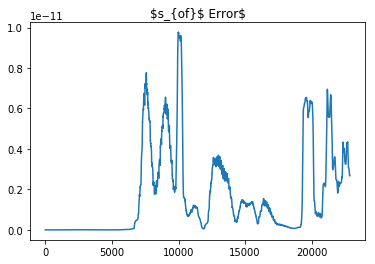

Average s_pe error: %.f 6.26711224067e-08


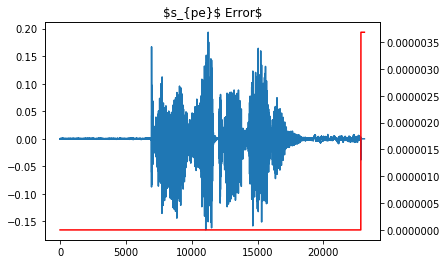

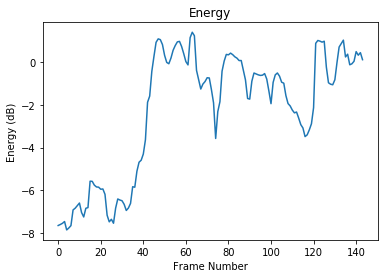

There were 2 frames
Spec: [[[[-55.98958051 -49.9689806 ]
   [-47.58722305 -41.56662314]
   [-50.10849483 -44.08789492]
   ..., 
   [-54.64914964 -48.62854973]
   [-53.85024177 -47.82964185]
   [-55.32373949 -49.30313958]]

  [[-62.4307727  -56.41017279]
   [-48.91753461 -42.89693469]
   [-58.76472313 -52.74412322]
   ..., 
   [-62.54247586 -56.52187595]
   [-65.68224616 -59.66164625]
   [-62.11119467 -56.09059475]]

  [[-42.37092751 -36.3503276 ]
   [-43.62969315 -37.60909324]
   [-46.66933316 -40.64873324]
   ..., 
   [-61.5389449  -55.51834498]
   [-61.6454395  -55.62483959]
   [-75.22067826 -69.20007835]]

  ..., 
  [[-21.66504185 -15.64444194]
   [-15.37637416  -9.35577425]
   [ -9.37091478  -3.35031487]
   ..., 
   [-41.16453324 -35.14393333]
   [-58.47637546 -52.45577555]
   [-54.93463645 -48.91403654]]

  [[-18.1644427  -12.14384278]
   [-18.86583411 -12.8452342 ]
   [-11.9306115   -5.91001159]
   ..., 
   [-43.13261264 -37.11201273]
   [-45.81837683 -39.79777692]
   [-48.337898

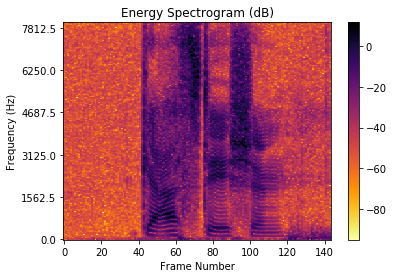

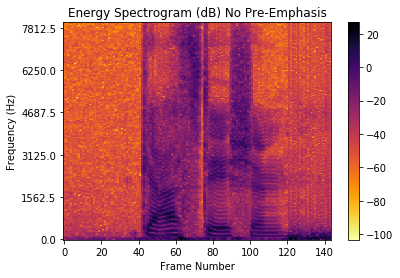

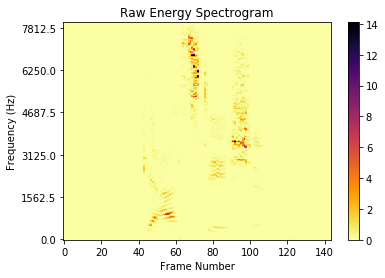

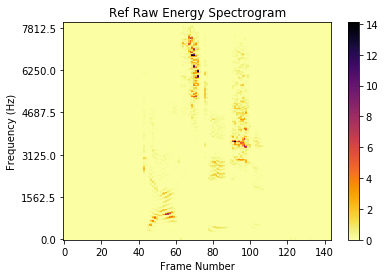

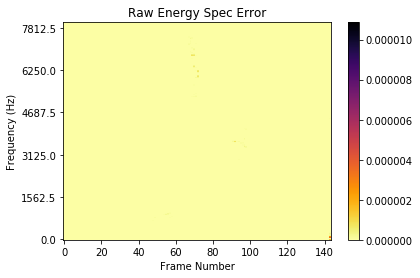

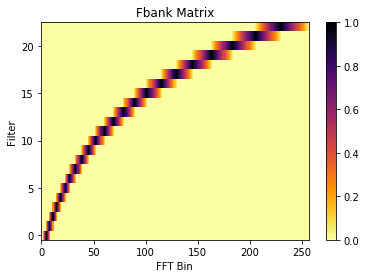

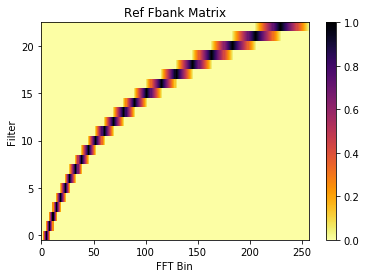

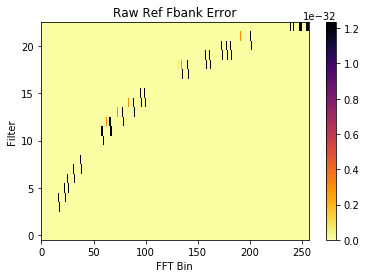

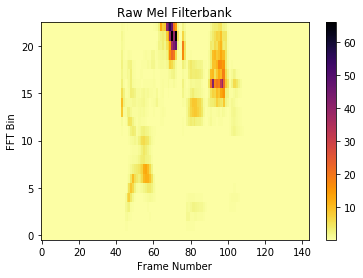

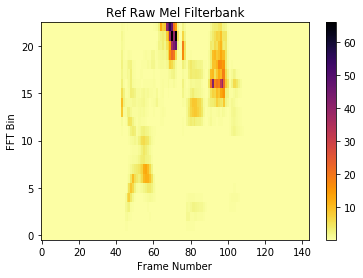

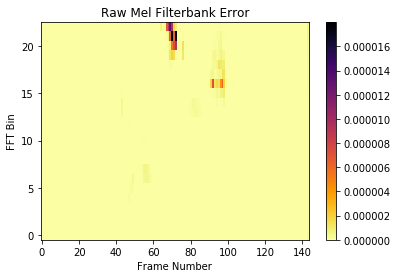

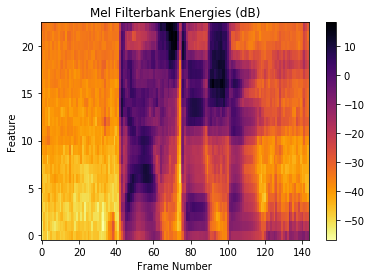

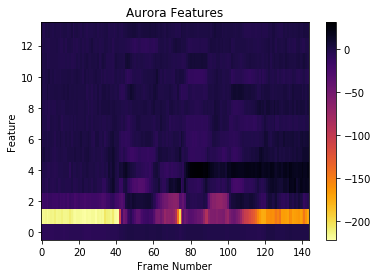

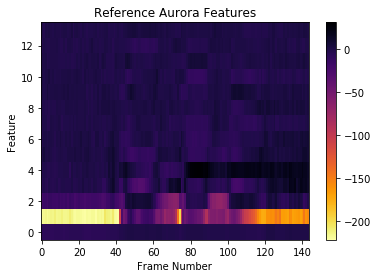

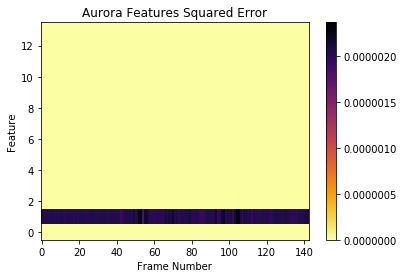

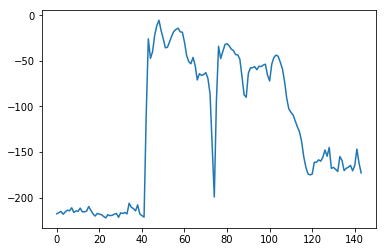

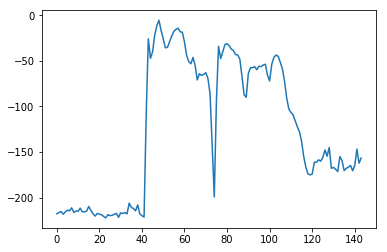

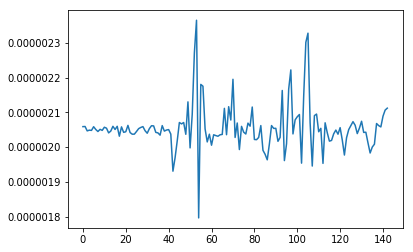

In [1]:
import audio
audio.example()

In [73]:
sample_rate, s_in = audio.read_wav_audio("./scratch/lab1-resources/gas_station.wav")
s_in = scipy.io.loadmat("./scratch/s_in.mat")["s"][:,0]

In [74]:
print(s_in[:10])

[-0.00054932 -0.00067139 -0.0012207  -0.0010376  -0.00064087 -0.0005188
 -0.00057983 -0.00054932 -0.00036621 -0.00100708]


In [75]:
import numpy as np
print(np.mean(s_in))
s = s_in - np.mean(s_in)
length = 10001
s = s_in[:length]

3.14902865468e-05


In [76]:
s_pe1 =  np.concatenate([s[1:], [0]]) - s

In [77]:
s_pe3 = s - np.concatenate([[0], s[:-1]])

In [78]:
g = np.zeros(s.shape[0])
off = 0
g[length // 2 + off] = 1
g[length // 2 - 1 + off] = -0.97
s_pe2 = np.fft.irfft(np.fft.rfft(s) * np.fft.rfft(g))

In [84]:
import scipy.io
s_in_ref = scipy.io.loadmat("./scratch/s_in.mat")["s"][:length,0]
s_of = scipy.io.loadmat("./scratch/s_of_ref.mat")["s_of"][:length,0]
s_pe = scipy.io.loadmat("./scratch/spe.mat")["s_pe"][:length,0]
m = np.mean(np.square(s_pe))
mof = np.mean(np.square(s_of))
m_in = np.mean(np.square(s_in_ref))
print(np.mean(np.square(s_in[:length] - s_in_ref)))
print(np.mean(np.square(s_of - s)))
print(np.mean(np.square(s_pe1 - s_pe)),
      np.mean(np.square(s_pe2 - s_pe[1:])),
      np.mean(np.square(s_pe3 - s_pe)))

0.0
9.91638146801e-10
0.000128839275393 0.000356486742233 1.13683389019e-06


In [ ]:
import tensorflow as tf
import scoping
import audio
with tf.name_scope("test"):
    with tf.name_scope("world"):
        a = audio.magnitude(-5)
        b = audio.magnitude(3)
        print(a)
        print(b)
    c = audio.magnitude(2)
    print(c)